## 数据导入

In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

batch_size=256

d2l.use_svg_display()
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)

train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=4)
test_iter = data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=4)

## 网络构建

In [2]:
from torch.nn import Parameter

input = 28*28
output = 10
hidden_layer_nodes = 256

W_1 = Parameter(torch.normal(0,0.01,(input,hidden_layer_nodes),requires_grad=True))
b_1 = Parameter(torch.zeros(hidden_layer_nodes,requires_grad=True))
W_2 = Parameter(torch.normal(0,0.01,(hidden_layer_nodes,output),requires_grad=True))
b_2 = Parameter(torch.zeros(output,requires_grad=True))
parameters = (W_1,b_1,W_2,b_2)

In [3]:
def relu(X):
    zeros = torch.zeros_like(X)
    return torch.max(zeros,X)

In [4]:
def net(X,W_1,b_1,W_2,b_2):
    X = X.reshape((-1,input))
    Hidden = relu(torch.matmul(X,W_1) + b_1)
    Output = torch.matmul(Hidden,W_2) + b_2
    return Output

In [5]:
loss = torch.nn.CrossEntropyLoss()
optim = torch.optim.SGD(parameters,lr=0.05)

## 训练

In [6]:
epochs = 10

for epoch in range(epochs):
    for X,y in train_iter:
        l = loss(net(X,W_1,b_1,W_2,b_2),y)
        optim.zero_grad()
        l.backward()
        optim.step()
    with torch.no_grad():
        print(f"epoch{epoch+1}    test_acc {d2l.evaluate_accuracy_gpu(lambda X:net(X,W_1,b_1,W_2,b_2),iter(test_iter))}") 

epoch1    test_acc 0.6848
epoch2    test_acc 0.7583
epoch3    test_acc 0.7911
epoch4    test_acc 0.7914
epoch5    test_acc 0.809
epoch6    test_acc 0.8145
epoch7    test_acc 0.8216
epoch8    test_acc 0.8276
epoch9    test_acc 0.8029
epoch10    test_acc 0.8337


array([<Axes: title={'center': 'coat\ncoat'}>,
       <Axes: title={'center': 'ankle boot\nankle boot'}>,
       <Axes: title={'center': 'shirt\nshirt'}>,
       <Axes: title={'center': 'coat\ncoat'}>,
       <Axes: title={'center': 'ankle boot\nankle boot'}>,
       <Axes: title={'center': 'ankle boot\nsneaker'}>], dtype=object)

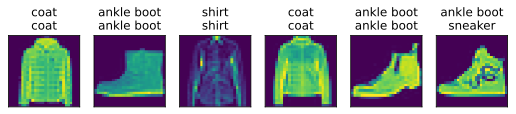

In [7]:
n = 6
preds = d2l.get_fashion_mnist_labels(net(X,W_1,b_1,W_2,b_2).argmax(1))
trues = d2l.get_fashion_mnist_labels(y)
titles = [pred + "\n" + true for pred,true in zip(preds,trues)]
images = X[0:6].reshape((n,28,28))
d2l.show_images(images,1,n,titles=titles)

## 利用 torch.nn 实现

In [13]:
import torch.nn as nn

In [14]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(28*28,256),
                    nn.ReLU(),
                    nn.Linear(256,10),
                    nn.Softmax(dim=1))

def init_layer(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0,0.01)
        m.bias.data.fill_(0)

loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(),lr=0.05)

net.apply(init_layer)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
  (4): Softmax(dim=1)
)

In [15]:
train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=4)
test_iter = data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=4)

In [16]:
from torch.nn.functional import one_hot
epochs = 45

for epoch in range(epochs):
    for X,y in train_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    with torch.no_grad():
        if (epoch+1)%5 == 0:
            print(f" epoch{epoch+1} test_acc {d2l.evaluate_accuracy_gpu(net,iter(test_iter))}")

 epoch5 test_acc 0.6667
 epoch10 test_acc 0.7561
 epoch15 test_acc 0.7787
 epoch20 test_acc 0.7887
 epoch25 test_acc 0.7923
 epoch30 test_acc 0.7955
 epoch35 test_acc 0.8013
 epoch40 test_acc 0.8023
 epoch45 test_acc 0.8057


array([<Axes: title={'center': 'ankle boot\nankle boot'}>,
       <Axes: title={'center': 'pullover\npullover'}>,
       <Axes: title={'center': 'trouser\ntrouser'}>,
       <Axes: title={'center': 'trouser\ntrouser'}>,
       <Axes: title={'center': 'pullover\nshirt'}>,
       <Axes: title={'center': 'trouser\ntrouser'}>], dtype=object)

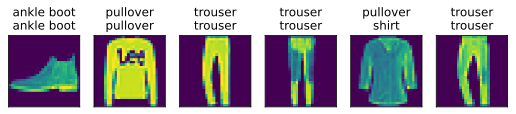

In [19]:
n = 6
X,y = next(iter(test_iter))
preds = d2l.get_fashion_mnist_labels(net(X).argmax(1))
trues = d2l.get_fashion_mnist_labels(y)
titles = [pred + "\n" + true for pred,true in zip(preds,trues)]
images = X[0:6].reshape((n,28,28))
d2l.show_images(images,1,n,titles=titles)